In [1]:
import requests
import os

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson'
parameters = {
    'format': 'geojson',
    'starttime': '2024-04-01',
    'endtime': '2024-04-30',
    'minmagnitude': 4.0,
    'orderby': 'time'
}

response = requests.get(url, params=parameters)

if response.status_code == 200:
    output_file = 'earthquake_data.geojson'
    with open(output_file, 'wb') as f:
        f.write(response.content)
    print(f"Earthquake data saved to {output_file}")
else:
    print(f"Failed to retrieve earthquake data: {response.status_code}")


Earthquake data saved to earthquake_data.geojson


In [3]:
import requests
import os

url = 'https://earthquake.usgs.gov/fdsnws/event/1/query.geojson'
parameters = {
    'format': 'geojson',
    'starttime': '2024-04-01',
    'endtime': '2024-04-30',
    'minmagnitude': 4.0,
    'orderby': 'time'
}

response = requests.get(url, params=parameters)

if response.status_code == 200:
    output_file = 'earthquake_data.geojson'
    with open(output_file, 'wb') as f:
        f.write(response.content)
    
    abs_path = os.path.abspath(output_file)
    print(f"Earthquake data saved to: {abs_path}")
else:
    print(f"Failed to retrieve earthquake data: {response.status_code}")


Earthquake data saved to: C:\Users\hp\earthquake_data.geojson


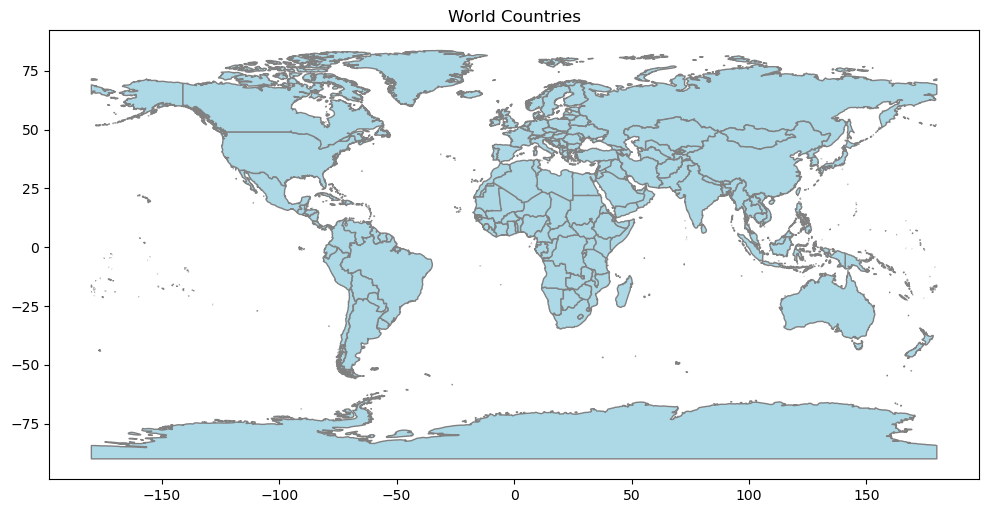

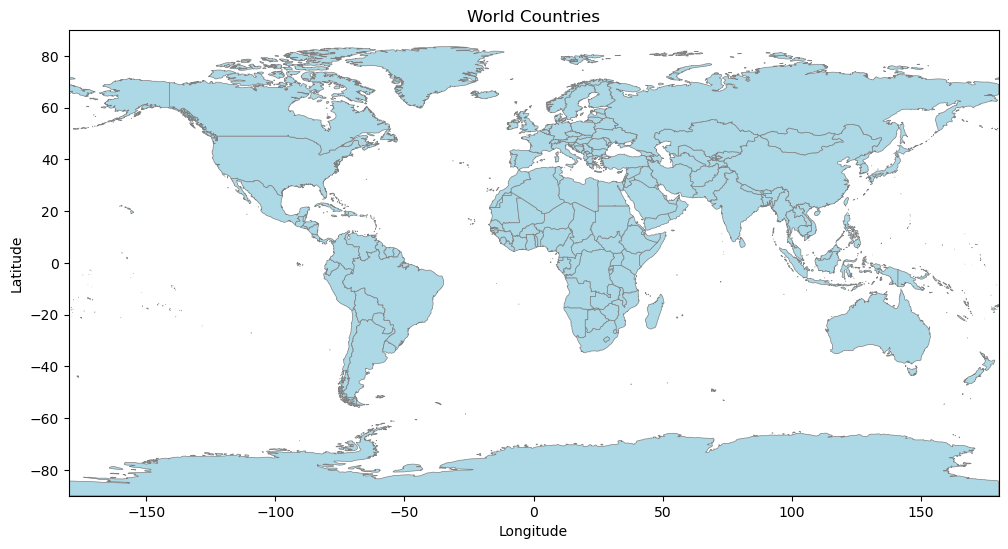

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = r'C:\Users\hp\Downloads\ids project\ne_50m_admin_0_countries\ne_50m_admin_0_countries.shp'

world_countries = gpd.read_file(shapefile_path)

fig, ax = plt.subplots(figsize=(12, 8))
world_countries.plot(ax=ax, edgecolor='gray', facecolor='lightblue')
ax.set_title('World Countries')
plt.show()

fig, ax = plt.subplots(figsize=(12, 8))
world_countries.plot(ax=ax, edgecolor='gray', facecolor='lightblue', linewidth=0.5)
ax.set_title('World Countries')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
ax.set_xlim([-180, 180])  
ax.set_ylim([-90, 90])     
plt.show()





           id  mag                                place           time  \
0  us6000mv2u  5.1       2 km NE of Villa Corzo, Mexico  1714434135461   
1  us6000mv2n  4.3       147 km NW of Tobelo, Indonesia  1714430459633   
2  us6000mv2a  4.4  75 km ESE of Sarangani, Philippines  1714429449647   
3  us6000mv1s  4.7    168 km SSE of Vilyuchinsk, Russia  1714422132190   
4  us6000mv1i  4.7  237 km SE of Alo, Wallis and Futuna  1714422112874   

         updated    tz                                                url  \
0  1714446522621  None  https://earthquake.usgs.gov/earthquakes/eventp...   
1  1714432999040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
2  1714430817040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
3  1714423626040  None  https://earthquake.usgs.gov/earthquakes/eventp...   
4  1714423126040  None  https://earthquake.usgs.gov/earthquakes/eventp...   

                                              detail  felt  cdi  ...  \
0  https://earthquak

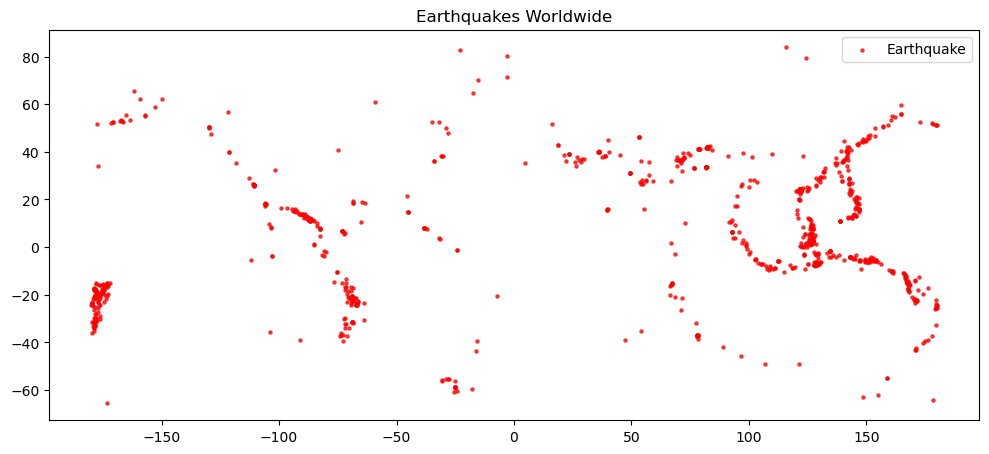

In [15]:
import geopandas as gpd
import matplotlib.pyplot as plt

earthquake_data = gpd.read_file(r'C:\Users\hp\Downloads\ids project\earthquake_data.geojson')

print(earthquake_data.head())

fig, ax = plt.subplots(figsize=(12, 8))
earthquake_data.plot(ax=ax, color='red', markersize=5, alpha=0.7, label='Earthquake')

ax.set_title('Earthquakes Worldwide')
plt.legend()
plt.show()


Index(['id', 'mag', 'place', 'time', 'updated', 'tz', 'url', 'detail', 'felt',
       'cdi', 'mmi', 'alert', 'status', 'tsunami', 'sig', 'net', 'code', 'ids',
       'sources', 'types', 'nst', 'dmin', 'rms', 'gap', 'magType', 'type',
       'title', 'geometry'],
      dtype='object')


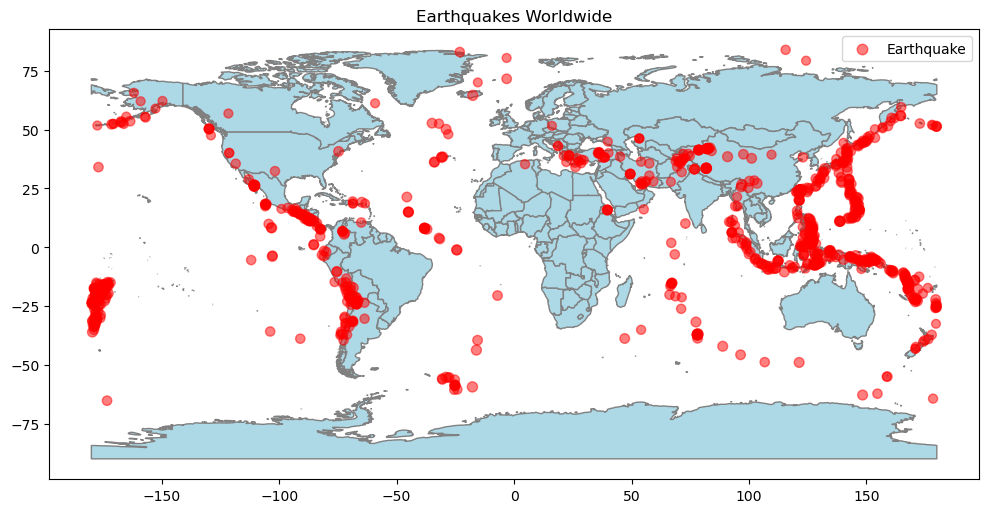

In [20]:
import geopandas as gpd
import matplotlib.pyplot as plt

shapefile_path = r'C:\Users\hp\Downloads\ids project\ne_50m_admin_0_countries\ne_50m_admin_0_countries.shp'
world_countries = gpd.read_file(shapefile_path)

earthquake_data = gpd.read_file(r'C:\Users\hp\Downloads\ids project\earthquake_data.geojson')

print(earthquake_data.columns)

fig, ax = plt.subplots(figsize=(12, 8))
world_countries.plot(ax=ax, edgecolor='gray', facecolor='lightblue')

ax.scatter(earthquake_data.geometry.x, earthquake_data.geometry.y, 
           s=earthquake_data['mag']*10, color='red', alpha=0.5, label='Earthquake')

ax.set_title('Earthquakes Worldwide')
plt.legend()
plt.show()


In [5]:
import requests

def fetch_real_time_earthquake_data():
    url = "https://earthquake.usgs.gov/earthquakes/feed/v1.0/summary/all_hour.geojson"
    response = requests.get(url)
    data = response.json()
    return data





def preprocess_real_time_data(data):
    # Extract relevant features and clean the data
    features = []
    for quake in data['features']:
        properties = quake['properties']
        magnitude = properties['mag']
        location = properties['place']
        time = properties['time']
        features.append({'magnitude': magnitude, 'location': location, 'time': time})
    return features




def predict_earthquake():
    magnitude = float(magnitude_entry.get())
    location = location_entry.get()
    
    # Placeholder model prediction (replace with your trained model)
    if magnitude >= 5.0:
        prediction = "Likely"
    else:
        prediction = "Unlikely"
    
    messagebox.showinfo("Prediction", f"Earthquake prediction for {location} with magnitude {magnitude}: {prediction}")


In [3]:
import tkinter as tk
from tkinter import messagebox

def predict_earthquake():
    # Placeholder function for earthquake prediction
    messagebox.showinfo("Prediction", "Prediction will appear here")

# Create GUI
root = tk.Tk()
root.title("Real-Time Earthquake Prediction")

# Input fields
tk.Label(root, text="Magnitude:").pack()
magnitude_entry = tk.Entry(root)
magnitude_entry.pack()

tk.Label(root, text="Location:").pack()
location_entry = tk.Entry(root)
location_entry.pack()

# Button to trigger prediction
predict_button = tk.Button(root, text="Predict", command=predict_earthquake)
predict_button.pack()

# Run GUI
root.mainloop()


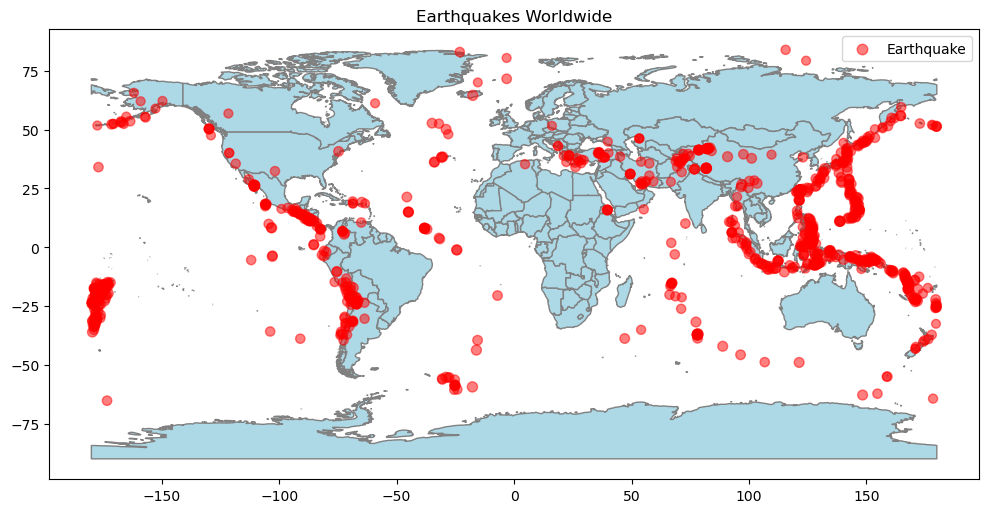

In [2]:
import tkinter as tk
from tkinter import messagebox
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

# Load world map data
shapefile_path = r'C:\Users\hp\Downloads\ids project\ne_50m_admin_0_countries\ne_50m_admin_0_countries.shp'
world_countries = gpd.read_file(shapefile_path)

# Function to fetch and display earthquake data
def fetch_and_display_earthquakes(world_map):
    earthquake_data = gpd.read_file(r'C:\Users\hp\Downloads\ids project\earthquake_data.geojson')

    fig, ax = plt.subplots(figsize=(12, 8))
    world_map.plot(ax=ax, edgecolor='gray', facecolor='lightblue')

    ax.scatter(earthquake_data.geometry.x, earthquake_data.geometry.y, 
               s=earthquake_data['mag']*10, color='red', alpha=0.5, label='Earthquake')

    ax.set_title('Earthquakes Worldwide')
    plt.legend()

    canvas = FigureCanvasTkAgg(fig, master=root)
    canvas.draw()
    canvas.get_tk_widget().pack()

# Create GUI
root = tk.Tk()
root.title("Real-Time Earthquake Prediction")

# Button to display earthquakes on the map
show_earthquakes_button = tk.Button(root, text="Show Earthquakes", command=lambda: fetch_and_display_earthquakes(world_countries))
show_earthquakes_button.pack()

# Run GUI
root.mainloop()


In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import time
import tkinter as tk
from tkinter import messagebox
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
from your_module import fetch_real_time_earthquake_data, preprocess_real_time_data

def update_real_time_earthquakes():
    while True:
        # Fetch real-time earthquake data
        data = fetch_real_time_earthquake_data()
        features = preprocess_real_time_data(data)

        # Plot the updated data on the map
        fig, ax = plt.subplots(figsize=(12, 8))
        world_countries.plot(ax=ax, edgecolor='gray', facecolor='lightblue')

        for feature in features:
            ax.scatter(feature['longitude'], feature['latitude'], 
                       s=feature['magnitude']*10, color='red', alpha=0.5, label='Earthquake')

        ax.set_title('Real-Time Earthquakes Worldwide')
        plt.legend()

        # Update canvas in Tkinter GUI
        canvas = FigureCanvasTkAgg(fig, master=root)
        canvas.draw()
        canvas.get_tk_widget().pack()

        # Wait for some time before updating again (e.g., every minute)
        time.sleep(60)

# Create GUI
root = tk.Tk()
root.title("Real-Time Earthquake Map")

# Start updating real-time earthquakes
update_real_time_earthquakes()

# Run GUI
root.mainloop()


ModuleNotFoundError: No module named 'your_module'